<a href="https://colab.research.google.com/github/jamesdvance/BraceYourself/blob/main/FastSAM_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! git clone https://github.com/CASIA-IVA-Lab/FastSAM.git

Cloning into 'FastSAM'...
remote: Enumerating objects: 1171, done.
remote: Counting objects: 100% (242/242), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 1171 (delta 201), reused 186 (delta 186), pack-reused 929
Receiving objects: 100% (1171/1171), 72.45 MiB | 41.70 MiB/s, done.
Resolving deltas: 100% (456/456), done.


In [3]:
! wget https://huggingface.co/spaces/An-619/FastSAM/resolve/main/weights/FastSAM.pt

--2023-10-22 12:40:53--  https://huggingface.co/spaces/An-619/FastSAM/resolve/main/weights/FastSAM.pt
Resolving huggingface.co (huggingface.co)... 65.8.178.12, 65.8.178.27, 65.8.178.93, ...
Connecting to huggingface.co (huggingface.co)|65.8.178.12|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/71/c3/71c3ec5a83f3fc374665cec9240f614262e29088fca1a18732571e13c7084f1b/c0be4e7ddbe4c15333d15a859c676d053c486d0a746a3be6a7a9790d52a9b6d7?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27FastSAM.pt%3B+filename%3D%22FastSAM.pt%22%3B&Expires=1698237653&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTY5ODIzNzY1M319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy83MS9jMy83MWMzZWM1YTgzZjNmYzM3NDY2NWNlYzkyNDBmNjE0MjYyZTI5MDg4ZmNhMWExODczMjU3MWUxM2M3MDg0ZjFiL2MwYmU0ZTdkZGJlNGMxNTMzM2QxNWE4NTljNjc2ZDA1M2M0ODZkMGE3NDZhM2JlNmE3YTk3OTBkNTJhOWI2ZDc%7EcmVzcG9uc2UtY29ud

In [22]:
! pip install -r FastSAM/requirements.txt
! pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-81hqu6nw
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-81hqu6nw
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.1 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369497 sha256=ac9855fd3feb615b7162a8f6d260ae4fede789099ff90b10fe798db89b45b356
  Stored in directory: /tmp/pip-ephem-wheel-cache-b86q03x1/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [5]:
import matplotlib.pyplot as plt
import cv2

In [189]:
IMG_PATH = "drive/MyDrive/braces_and_teeth/teeth2/train/2001.png"

In [14]:
from PIL import Image
img1 = Image.open("drive/MyDrive/braces_and_teeth/teeth2/train/2001.png")

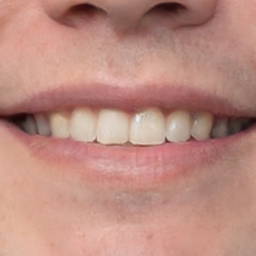

In [15]:
img1

In [16]:
img1_cv = cv2.imread("drive/MyDrive/braces_and_teeth/teeth2/train/2001.png")
img1_cv = cv2.cvtColor(img1_cv, cv2.COLOR_BGR2RGB)

256 256


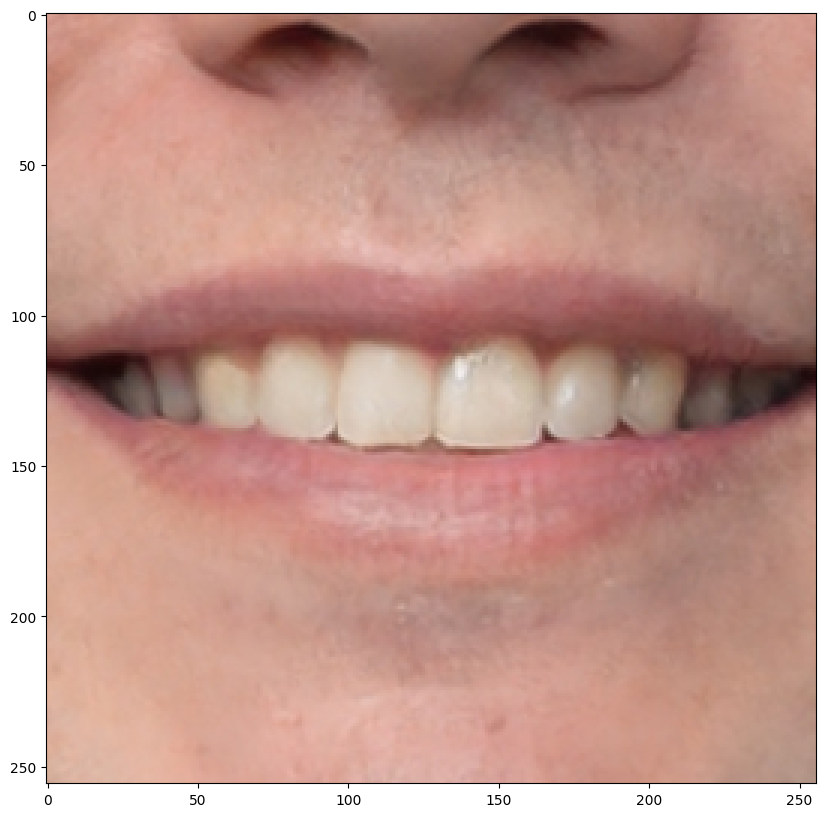

In [17]:
orig_h = img1_cv.shape[0]
orig_w = img1_cv.shape[1]
print(orig_w, orig_h)
plt.figure(figsize=(10,10))
plt.imshow(img1_cv)

In [23]:
!python FastSAM/Inference.py --model_path FastSAM.pt --img_path ./drive/MyDrive/braces_and_teeth/teeth2/train/2001.png --imgsz 256


0: 256x256 8 objects, 1214.2ms
Speed: 6.1ms preprocess, 1214.2ms inference, 53.5ms postprocess per image at shape (1, 3, 256, 256)


In [24]:
segd_img = cv2.imread("output/2001.png")

In [25]:
segd_img = cv2.cvtColor(segd_img, cv2.COLOR_BGR2RGB)

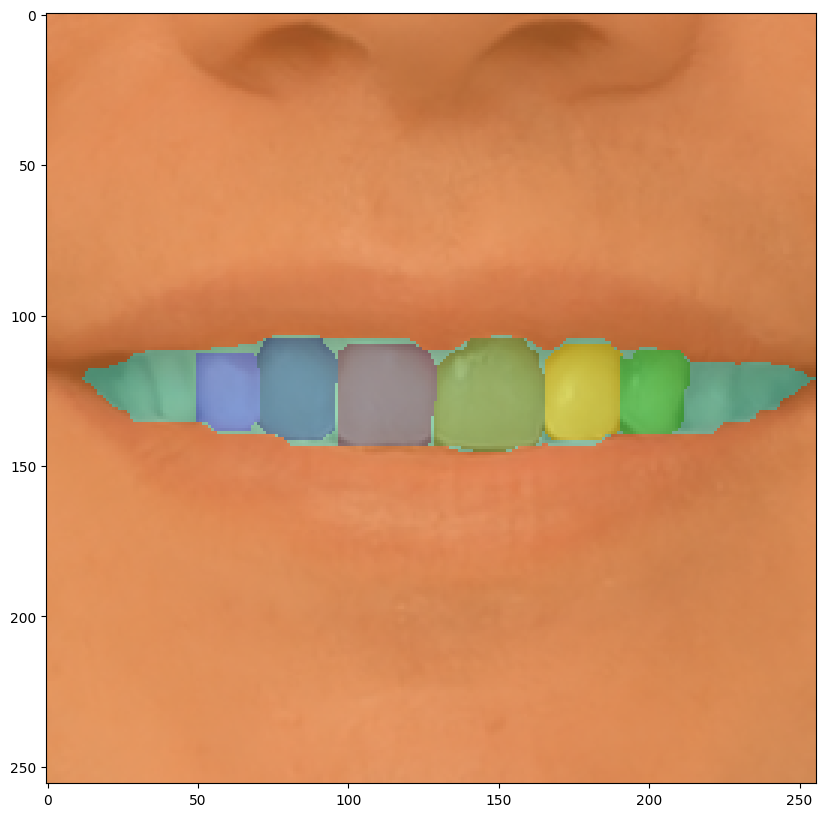

In [27]:
plt.figure(figsize=(10,10))
plt.imshow(segd_img )

In [133]:
!python FastSAM/Inference.py --model_path FastSAM.pt --img_path ./drive/MyDrive/braces_and_teeth/teeth2/train/2001.png --imgsz 256 \
  --withContours True \
  --better_quality True --point_label [1]



0: 256x256 8 objects, 1929.8ms
Speed: 3.9ms preprocess, 1929.8ms inference, 9.3ms postprocess per image at shape (1, 3, 256, 256)


In [134]:
! ls output

2001.png


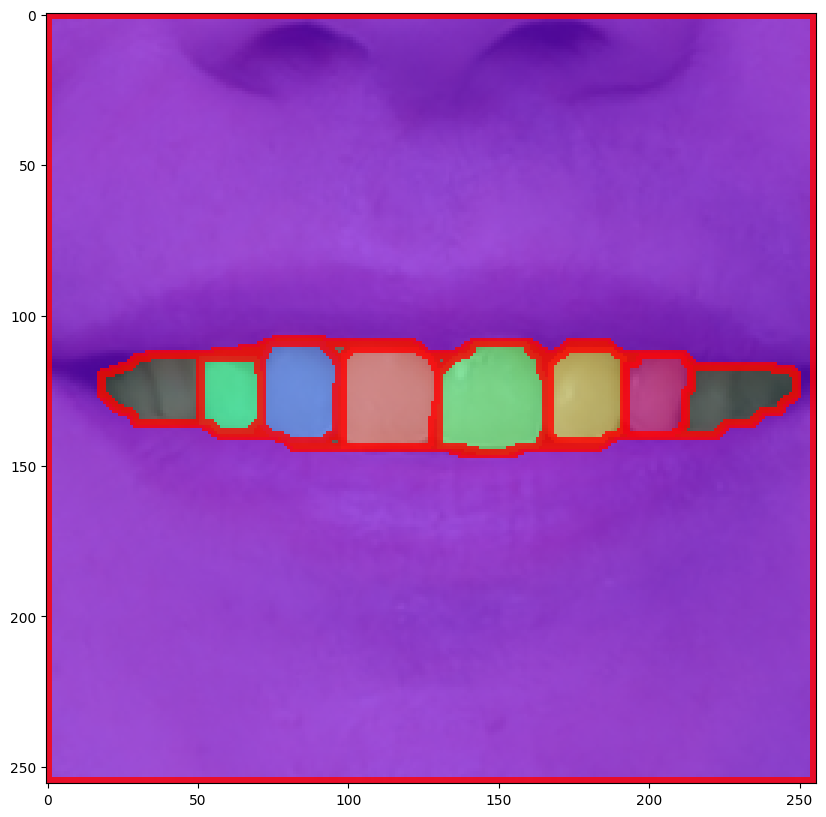

In [135]:
segd_img = cv2.imread("output/2001.png")
segd_img = cv2.cvtColor(segd_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(segd_img )

In [38]:
segd_img.shape

(256, 256, 3)

In [47]:
import numpy as np

[227  42  22]


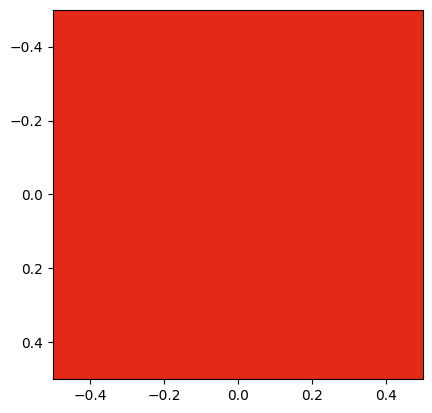

In [111]:
print(segd_img[0,0])
plt.imshow(np.array([[segd_img[0,0]]]))

[246  17  13]


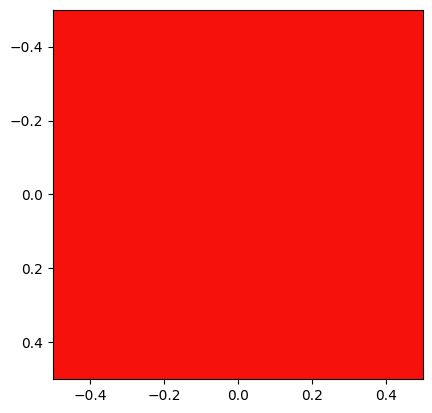

In [113]:
print(segd_img[145,150])
plt.imshow(np.array([[segd_img[145,150]]]))

[223  38  18]


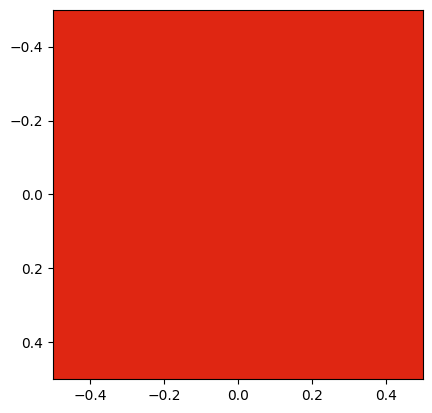

In [118]:
print(segd_img[145,128])
plt.imshow(np.array([[segd_img[145,128]]]))

In [114]:
outline_col = segd_img[145,150]

In [93]:
segd_img[145,150]

array([246,  17,  13], dtype=uint8)

In [94]:
teeth_outline = segd_img.copy()

#### Algorithm to Find the 'Center-Tooth' keypoint:

1. Find max left and max right pixel which match the outline color
2. Find max top and max bottom which match the outline color.
3. Move right from the leftmost part, starting at the in-between pixel of max and left.
4. Once you reach another outline pixel, go to the middle between the two pixels. Then move up and down until you find the nearest pixels top and bottom
5. Calculate the two haflway points to find the 'center-tooth keypoint'.
6. Continue traversing right until you find non-outline color and continue the algorithm.

Can work with step size to optimize the algorithm

In [123]:
import math
def pix_dist(col1, col2):
  #return math.sqrt((col1[0]-col2[0])**2+(col1[1]-col2[1])**2+(col1[2]-col2[2])**2)
  return math.sqrt((col1[0]-col2[0])**2)

In [124]:
### Getting highest outline pixel
w = segd_img.shape[1]//2
pix_distances = []
for h in range(3,segd_img.shape[0]): # start at 2 because there is a 2-pixel boundary with the outline color
  pix_distances.append(pix_dist(segd_img[h,w],segd_img[h-1,w]))

<ipython-input-123-a9371debb36c>:4: RuntimeWarning: overflow encountered in ubyte_scalars
  return math.sqrt((col1[0]-col2[0])**2)


In [107]:
list(segd_img[145,128]) == list(outline_col)

False

In [108]:
segd_img[145,128]

array([223,  38,  18], dtype=uint8)

In [109]:
list(outline_col)

[227, 42, 22]

In [84]:
outline_col

array([227,  42,  22], dtype=uint8)

#### Working From Model Masks or Logits

In [137]:
! pip install git+https://github.com/CASIA-IVA-Lab/FastSAM.git

  Cloning https://github.com/CASIA-IVA-Lab/FastSAM.git to /tmp/pip-req-build-ymz8e9m3
  Running command git clone --filter=blob:none --quiet https://github.com/CASIA-IVA-Lab/FastSAM.git /tmp/pip-req-build-ymz8e9m3
  Resolved https://github.com/CASIA-IVA-Lab/FastSAM.git to commit 38654b76b31d3178a8572579968f8eb404936318
  Preparing metadata (setup.py) ... done
  Created wheel for fastsam: filename=fastsam-0.1.1-py3-none-any.whl size=22338 sha256=1efff2d0ed61a4d304d16670108e2a3afd317cda50f82e12c1d13b63e44c1f6c
  Stored in directory: /tmp/pip-ephem-wheel-cache-sx8r18xg/wheels/49/01/f0/3f2cfd1f3fd7d91db818d8a1c896bd8024b79ffb65ef0f7b2d
Successfully built fastsam


In [184]:
!pip -q install git+https://github.com/facebookresearch/segment-anything.git
# install other dependencies
!pip -q install roboflow supervision jupyter_bbox_widget

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.8/367.8 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the followi

In [138]:
from fastsam import FastSAM, FastSAMPrompt

In [140]:
import torch

In [186]:
import supervision as sv

In [141]:
DEVICE = torch.device(
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

In [143]:
print(DEVICE)

cpu


In [139]:
model = FastSAM('FastSAM-x.pt')

100%|██████████| 138M/138M [00:01<00:00, 109MB/s]


In [145]:
model_output = model(
      source=img1,
      device=DEVICE,
      retina_masks=True,
      imgsz=256,
      conf=0.4,
      iou=0.9,
  )


0: 256x256 8 objects, 3534.4ms
Speed: 0.9ms preprocess, 3534.4ms inference, 26.7ms postprocess per image at shape (1, 3, 256, 256)


In [146]:
len(model_output[0].masks)

8

In [151]:
model_output[0].masks.shape

torch.Size([8, 256, 256])

In [ ]:
model_output[0].masks.shape

In [154]:
model_output[0]

ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: None
keys: ['boxes', 'masks']
masks: ultralytics.yolo.engine.results.Masks object
names: {0: 'object'}
orig_img: array([[[148, 161, 217],
        [148, 161, 217],
        [146, 159, 215],
        ...,
        [146, 158, 216],
        [146, 158, 216],
        [148, 159, 216]],

       [[147, 158, 216],
        [145, 156, 213],
        [140, 152, 210],
        ...,
        [141, 153, 211],
        [143, 155, 213],
        [146, 158, 215]],

       [[143, 154, 212],
        [140, 150, 209],
        [136, 147, 205],
        ...,
        [138, 150, 208],
        [141, 153, 211],
        [143, 155, 213]],

       ...,

       [[152, 173, 211],
        [155, 176, 214],
        [154, 174, 212],
        ...,
        [134, 148, 177],
        [133, 147, 176],
        [132, 147, 175]],

       [[151, 171, 209],
        [153, 174, 212],
        [153, 172, 210],
        ...

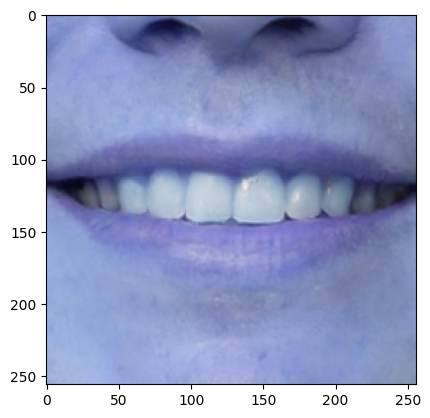

In [155]:
plt.imshow(model_output[0].orig_img)

In [176]:
model_output[0].masks[1].data

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [179]:
model_output[0].masks[1].data.max()

tensor(1.)

In [180]:
model_output[0].masks[1].data.min()

tensor(0.)

In [164]:
model_output[0].boxes[0].data.shape

torch.Size([1, 6])

In [170]:
arr = model_output[0].masks[0].data.cpu().detach().numpy()
arr2 = arr.reshape((arr.shape[1],arr.shape[2],arr.shape[0]))

In [171]:
arr2.shape

(256, 256, 1)

In [187]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

def annotate_image(image_path: str, masks: np.ndarray) -> np.ndarray:
    image = cv2.imread(image_path)

    xyxy = sv.mask_to_xyxy(masks=masks)
    detections = sv.Detections(xyxy=xyxy, mask=masks)

    mask_annotator = sv.MaskAnnotator()
    return mask_annotator.annotate(scene=image.copy(), detections=detections)

In [196]:
mask1 = model_output[0].masks[1].data.cpu().numpy().astype(bool)

In [201]:
prompt_process = FastSAMPrompt(IMG_PATH, model, device=DEVICE)


TypeError: ignored

In [192]:
annotated_image=annotate_image(image_path=IMG_PATH, masks=masks)

ValueError: ignored

In [190]:
#prompt_process = FastSAMPrompt(IMG_PATH, model, device=DEVICE)
#masks = prompt_process.everything_prompt()
#prompt_process.plot(annotations=masks, output=f"./output")

TypeError: ignored